# Q1- Load dataset and import libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
df_l=pd.read_csv("train_label.csv", header=None)
df["Total_booking"]=df_l[0]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df_test=pd.read_csv("test.csv")
df_test_label=pd.read_csv("test_label.csv", header=None)
df_test["Total_booking"]=df_test_label[0]
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


# Q2- Analyse the Dataset

In [ ]:
print("Shape of training data", df.shape)
print("Shape of test data", df_test.shape)

Shape of training data (8708, 10)
Shape of test data (2178, 10)


In [ ]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [ ]:
df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [ ]:
df.duplicated().any()

False

## Observations

1.   Training Data contains 8708 records with 10 columns
2.   Test Data contains 2718 records with 10 columns
3.   Dataset contains both numerical and categorical dtatype
4.   There is no missing values in the dataset
5.   There is no duplicated values in the dataset

## Q3- Feature Engineering

In [ ]:
def date_conv(data_f):
  d=[];
  h=[];
  w=[];
  m=[]
  for i in range(len(data_f)):
    date_time=dt.strptime(data_f.datetime[i], "%m/%d/%Y %H:%M")
    date=date_time.date()
    d.append(date)
    h.append(date_time.hour)
    m.append(date.month)
    w.append(calendar.day_name[calendar.weekday(date.year, date.month, date.day)])
  data_f["Hour"]=h
  data_f["Month"]=m
  data_f["Weekday"]=w
  data_f["Date"]=d
  return data_f

In [ ]:
df=date_conv(df)

In [ ]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
Hour               int64
Month              int64
Weekday           object
Date              object
dtype: object

In [ ]:
def coerce_to_cat(data_f, *features):
  for f in features:
    data_f[f]=data_f[f].astype('category')
    return data_f

In [ ]:
c=coerce_to_cat(df, ["season", "holiday", "workingday", "weather"])
c.dtypes

datetime           object
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
Hour                int64
Month               int64
Weekday            object
Date               object
dtype: object

In [ ]:
df=df.drop(["datetime"], axis=1)

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Weekday,Date
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19,5,Wednesday,2012-05-02
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4,9,Wednesday,2012-09-05
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9,1,Thursday,2011-01-13
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16,11,Friday,2011-11-18
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,Tuesday,2011-09-13


In [ ]:
df_test=date_conv(df_test)
df_test=coerce_to_cat(df_test, ["season", "holiday", "workingday", "weather"])
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Weekday,Date
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,11,5,Thursday,2012-05-10
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,7,6,Saturday,2012-06-09
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,20,3,Sunday,2011-03-06
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,11,10,Thursday,2011-10-13
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,12,6,Saturday,2012-06-02


## Q4- Outlier Analysis

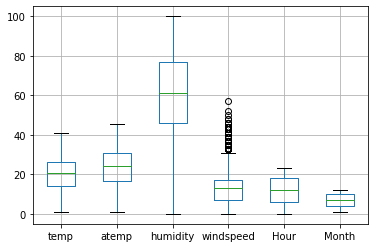

In [ ]:
df.drop(["Total_booking"], axis=1).boxplot()

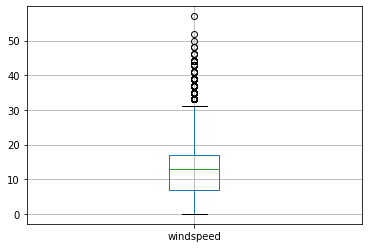

In [ ]:
df[["windspeed"]].boxplot()

In [ ]:
q1=df.windspeed.quantile(.25)
q3=df.windspeed.quantile(.75)
IQR=q3-q1
IQR

9.996400000000001

In [ ]:
df.windspeed[df.windspeed< (q1-IQR*1.5)]

Series([], Name: windspeed, dtype: float64)

In [ ]:
df.windspeed[df.windspeed> (q3+IQR*1.5)]

10      32.9975
32      32.9975
86      32.9975
105     36.9974
182     35.0008
         ...   
8496    32.9975
8555    36.9974
8563    32.9975
8603    35.0008
8640    43.0006
Name: windspeed, Length: 182, dtype: float64

In [ ]:
outlier=df.windspeed[df.windspeed> (q3+IQR*1.5)]
df.drop(outlier.index, axis=0, inplace=True)

In [ ]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Weekday,Date
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19,5,Wednesday,2012-05-02
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4,9,Wednesday,2012-09-05
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9,1,Thursday,2011-01-13
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16,11,Friday,2011-11-18
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,Tuesday,2011-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,6,1,Monday,2012-01-16
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,1,11,Thursday,2011-11-10
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,3,4,Tuesday,2011-04-12
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,1,11,Wednesday,2012-11-07


## Inferences



1.   Only windspeed contains outliers in the datafile.
2.   All outliers were present above third quantile.
2.   Total 182 records were found as outliers.
3.   After removing outliers, 8526 rows were left.



## Q5- Correlation

In [ ]:
df.corr()

,temp,atemp,humidity,windspeed,Total_booking,Hour,Month
temp,1.000000,0.984131,-0.074168,-0.010232,0.394338,0.149411,0.248808
atemp,0.984131,1.000000,-0.053346,-0.049286,0.389535,0.145401,0.254439
humidity,-0.074168,-0.053346,1.000000,-0.301306,-0.314783,-0.272052,0.190230
windspeed,-0.010232,-0.049286,-0.301306,1.000000,0.104158,0.128090,-0.129149
Total_booking,0.394338,0.389535,-0.314783,0.104158,1.000000,0.403229,0.167195
Hour,0.149411,0.145401,-0.272052,0.128090,0.403229,1.000000,-0.002441
Month,0.248808,0.254439,0.190230,-0.129149,0.167195,-0.002441,1.000000


In [ ]:
data=df[["Total_booking", "temp", "atemp", "humidity","windspeed"]]
data.head()

,Total_booking,temp,atemp,humidity,windspeed
0,504,22.14,25.760,77,16.9979
1,5,28.70,33.335,79,19.0012
2,139,5.74,6.060,50,22.0028
3,209,13.94,16.665,29,8.9981
4,184,30.34,33.335,51,19.0012


In [ ]:
data.corr()

,Total_booking,temp,atemp,humidity,windspeed
Total_booking,1.000000,0.394338,0.389535,-0.314783,0.104158
temp,0.394338,1.000000,0.984131,-0.074168,-0.010232
atemp,0.389535,0.984131,1.000000,-0.053346,-0.049286
humidity,-0.314783,-0.074168,-0.053346,1.000000,-0.301306
windspeed,0.104158,-0.010232,-0.049286,-0.301306,1.000000


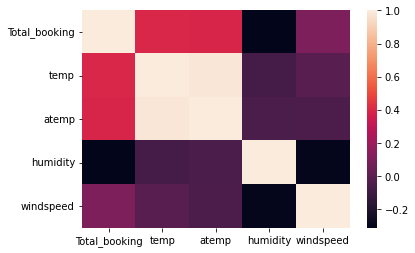

In [ ]:
sns.heatmap(data.corr())

## Inferences


1.   temp, atem and humidity affects Total_bookings made.
2.   windspeed slightly influence Total_bookings.
3.   holiday and working_day has approximately no affect on Total_bookings made.



## Q6- Data Visualization

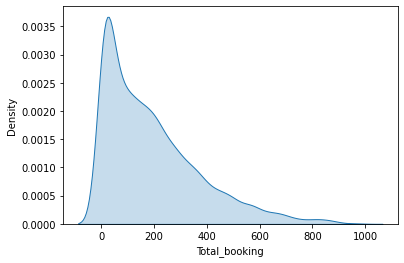

In [ ]:
sns.kdeplot(df["Total_booking"], shade="fill")
plt.show()

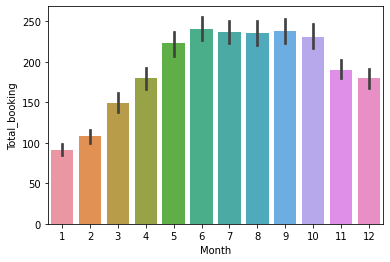

In [ ]:
sns.barplot(x="Month", y="Total_booking", data=df)

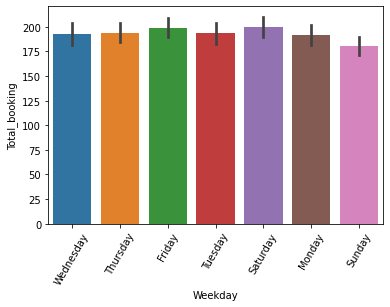

In [ ]:
sns.barplot(x="Weekday", y="Total_booking", data=df)
plt.xticks(rotation=60)
plt.show()

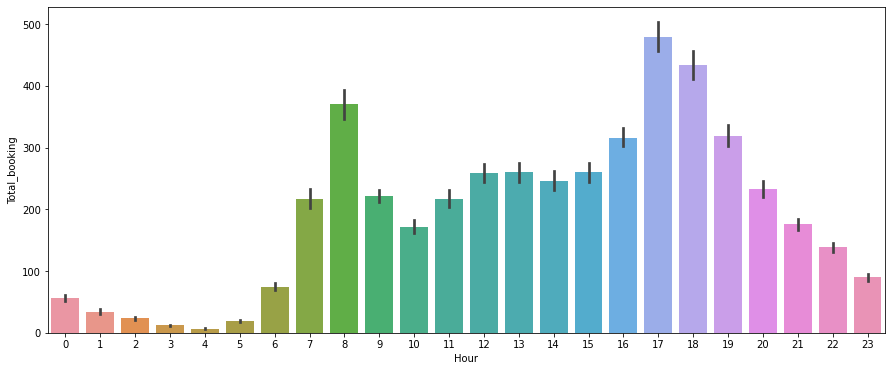

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Hour", y="Total_booking", data=df)
plt.show()

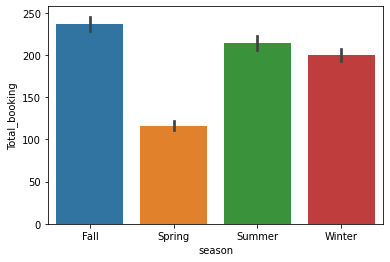

In [ ]:
sns.barplot(x="season", y="Total_booking", data=df)

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="atemp", y="Total_booking", color="season",
                 size='Hour', hover_data=['Weekday', 'Month'])
fig.show()

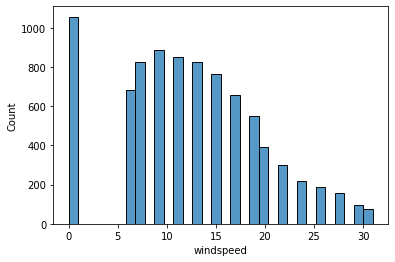

In [ ]:
sns.histplot(df["windspeed"])

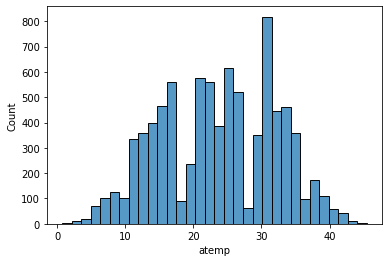

In [ ]:
sns.histplot(df["atemp"])

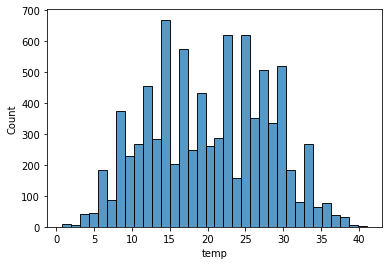

In [ ]:
sns.histplot(df["temp"])

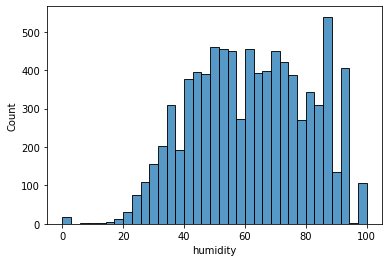

In [ ]:
sns.histplot(df["humidity"])

# Q7- One hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def Encoder(data_f, data_test, feature):
  oh=OneHotEncoder()
  out=oh.fit_transform(np.array(data_f[feature]).reshape(-1,1)).toarray()
  df_encoded=pd.DataFrame(out, columns=list(oh.categories_[0]), index=data_f.index)
  out=oh.transform(np.array(data_test[feature]).reshape(-1,1)).toarray()
  df_test_encoded=pd.DataFrame(out, columns=list(oh.categories_[0]), index=data_test.index)
  return data_f.join(df_encoded), data_test.join(df_test_encoded)

In [ ]:
df, df_test=Encoder(df, df_test, "weather")
df, df_test=Encoder(df, df_test, "season")
df, df_test=Encoder(df, df_test, "Weekday")
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Weekday,Date,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19,5,Wednesday,2012-05-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4,9,Wednesday,2012-09-05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9,1,Thursday,2011-01-13,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16,11,Friday,2011-11-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,Tuesday,2011-09-13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df=df.drop(["Weekday", "season", "weather"], axis=1)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Date,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,22.14,25.760,77,16.9979,504,19,5,2012-05-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,28.70,33.335,79,19.0012,5,4,9,2012-09-05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,5.74,6.060,50,22.0028,139,9,1,2011-01-13,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,13.94,16.665,29,8.9981,209,16,11,2011-11-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,30.34,33.335,51,19.0012,184,13,9,2011-09-13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Weekday,Date,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,11,5,Thursday,2012-05-10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,7,6,Saturday,2012-06-09,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,20,3,Sunday,2011-03-06,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,11,10,Thursday,2011-10-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,12,6,Saturday,2012-06-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Q8- Split

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(["Total_booking", "Date"], axis=1)
y=df["Total_booking"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

In [ ]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
4262,0,0,18.04,21.970,82,16.9979,2,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7205,1,0,16.40,20.455,76,0.0000,3,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2747,0,0,18.04,21.970,67,15.0013,21,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7782,0,1,13.12,15.150,66,22.0028,4,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5940,0,1,27.06,31.060,69,12.9980,16,6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Q9- Fitting Various Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
models=[RandomForestRegressor(),
        SVR(),
        KNeighborsRegressor(),
        AdaBoostRegressor(base_estimator=RandomForestRegressor() ),
        GradientBoostingRegressor(),
        BaggingRegressor(base_estimator=RandomForestRegressor())]

In [ ]:
import math
rme=[]
name=[]
for m in models:
  name.append(m.__class__.__name__)
  m.fit(X_train, y_train)
  y_pred=m.predict(X_test)
  rme.append(math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
s=pd.Series(name,rme)

In [ ]:
s

70.336652         RandomForestRegressor
161.427209                          SVR
124.129822          KNeighborsRegressor
68.771452             AdaBoostRegressor
86.851969     GradientBoostingRegressor
69.772213              BaggingRegressor
dtype: object

## Q10- RMSE

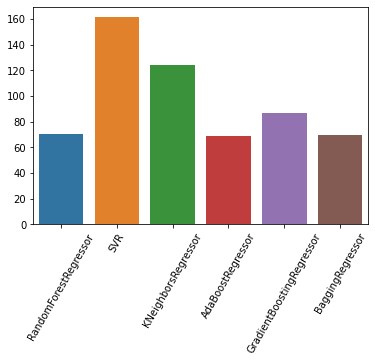

In [ ]:
sns.barplot(x=s.values, y=s.index)
plt.xticks(rotation=60)
plt.show()

## RandomForest and AdaBoost have lowest RMSE

Factor plot work with multiple values in one category.
Hence, cannot be used here

## Q11- GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
p = { 
    'n_estimators': [50, 200, 400, 500, 600],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8, None],
}
g_cv=GridSearchCV(estimator=RandomForestRegressor(), param_grid=p, cv=5)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 200, 400, 500, 600]})

In [ ]:
g_cv.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

## Q12- Perform predictions

In [ ]:
df_test=df_test.drop(["Weekday", "season", "weather", "Date", "datetime"], axis=1)
df_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,21.32,25.000,48,35.0008,256,11,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,23.78,27.275,64,7.0015,87,7,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,11.48,12.120,100,27.9993,11,20,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,25.42,28.790,83,0.0000,84,11,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,25.42,31.060,43,23.9994,668,12,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test=df_test.drop(["Total_booking"], axis=1)
y_test=df_test["Total_booking"]

In [ ]:
r=RandomForestRegressor(max_depth= None, max_features= 'auto', n_estimators= 200)
r.fit(X_train, y_train)
y_pred=r.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

66.78581886195083

In [ ]:
r.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import mean_squared_log_error
print("Mean squared log error is- ", mean_squared_log_error(y_test, y_pred))

Mean squared log error is-  0.19132851881501925
